In [3]:

from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

In [4]:
# Function to extract Product Title
def get_title(soup):

    try:
        # Outer Tag Object
        title = soup.find("span", attrs={"id":'productTitle'})

        # Inner NavigatableString Object
        title_value = title.text

        # Title as a string value
        title_string = title_value.strip()

    except AttributeError:
        title_string = ""

    return title_string

# Function to extract Product Price
def get_price(soup):

    try:
        price = soup.find("span", attrs={'id':'priceblock_ourprice'}).string.strip()

    except AttributeError:

        try:
            # If there is some deal price
            price = soup.find("span", attrs={'id':'priceblock_dealprice'}).string.strip()

        except:
            price = ""

    return price

# Function to extract Product Rating
def get_rating(soup):

    try:
        rating = soup.find("i", attrs={'class':'a-icon a-icon-star a-star-4-5'}).string.strip()

    except AttributeError:
        try:
            rating = soup.find("span", attrs={'class':'a-icon-alt'}).string.strip()
        except:
            rating = ""

    return rating

# Function to extract Number of User Reviews
def get_review_count(soup):
    try:
        review_count = soup.find("span", attrs={'id':'acrCustomerReviewText'}).string.strip()

    except AttributeError:
        review_count = ""

    return review_count

# Function to extract Availability Status
def get_availability(soup):
    try:
        available = soup.find("div", attrs={'id':'availability'})
        available = available.find("span").string.strip()

    except AttributeError:
        available = "Not Available"

    return available

In [5]:
if __name__ == '__main__':

    # add your user agent
    HEADERS = ({'User-Agent':'', 'Accept-Language': 'en-US, en;q=0.5'})

    # The webpage URL
    URL = "https://www.amazon.com/s?k=playstation+4&ref=nb_sb_noss_2"

    # HTTP Request
    webpage = requests.get(URL, headers=HEADERS)

    # Soup Object containing all data
    soup = BeautifulSoup(webpage.content, "html.parser")

    # Fetch links as List of Tag Objects
    links = soup.find_all("a", attrs={'class':'a-link-normal s-no-outline'})

    # Store the links
    links_list = []

    # Loop for extracting links from Tag Objects
    for link in links:
            links_list.append(link.get('href'))

    d = {"title":[], "price":[], "rating":[], "reviews":[],"availability":[]}

    # Loop for extracting product details from each link
    for link in links_list:
        new_webpage = requests.get("https://www.amazon.com" + link, headers=HEADERS)

        new_soup = BeautifulSoup(new_webpage.content, "html.parser")

        # Function calls to display all necessary product information
        d['title'].append(get_title(new_soup))
        d['price'].append(get_price(new_soup))
        d['rating'].append(get_rating(new_soup))
        d['reviews'].append(get_review_count(new_soup))
        d['availability'].append(get_availability(new_soup))


    amazon_df = pd.DataFrame.from_dict(d)
    amazon_df['title'].replace('', np.nan, inplace=True)
    amazon_df = amazon_df.dropna(subset=['title'])
    amazon_df.to_csv("amazon_data.csv", header=True, index=False)

In [6]:
amazon_df

,title,price,rating,reviews,availability
0,PlayStation 4 500GB Console (Renewed),,4.1 out of 5 stars,698 ratings,Only 9 left in stock - order soon.
1,PlayStation 4 Slim 1TB Console - Black (Renewed),,4.3 out of 5 stars,"1,367 ratings",In Stock
2,Sony Playstation PS4 1TB Black Console,,4.6 out of 5 stars,"1,200 ratings",In Stock
3,Sony PlayStation 4 Slim Limited Edition 1TB Ga...,,4.3 out of 5 stars,"1,213 ratings",In Stock
4,"Sony PlayStation 4 Pro w/ Accessories, 1TB HDD...",,4.0 out of 5 stars,658 ratings,Only 1 left in stock - order soon.
5,"Playstation Sony 4, 500GB Slim System [CUH-221...",,4.6 out of 5 stars,324 ratings,Only 5 left in stock - order soon
6,PlayStation 4 Slim 500GB Console [Discontinued...,,4.5 out of 5 stars,"1,320 ratings",In Stock
7,Sony PlayStation 4 PRO 1TB Gaming Console - Bl...,,3.9 out of 5 stars,154 ratings,Only 11 left in stock - order soon.
8,PlayStation 4 Console - 1TB Slim Edition (Rene...,,4.7 out of 5 stars,37 ratings,In Stock
9,Sony PlayStation 4 500GB Console Only (Certifi...,,3.0 out of 5 stars,7 ratings,Only 3 left in stock - order soon.


No charts were generated by quickchart


In [12]:
import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df, *['availability'], **{})
chart

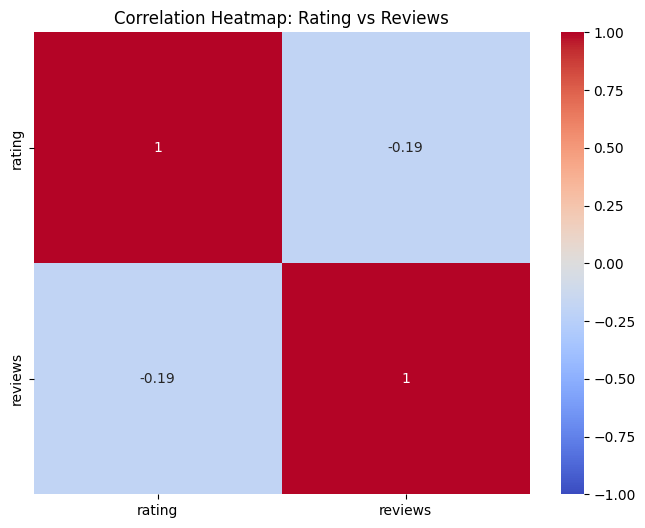

                   Correlation
Rating vs Reviews    -0.191654


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV file you saved earlier
amazon_df = pd.read_csv("amazon_data.csv")

# Convert 'rating' to a numeric column
amazon_df['rating'] = amazon_df['rating'].str.extract('(\d+\.\d+)').astype(float)

# Extract and convert the numeric part of the 'reviews' column
amazon_df['reviews'] = amazon_df['reviews'].str.extract('(\d+)').astype(float)

# Calculate the correlation coefficient between 'rating' and 'reviews'
correlation = amazon_df['rating'].corr(amazon_df['reviews'])

# Create a correlation table
correlation_table = pd.DataFrame({'Correlation': [correlation]}, index=['Rating vs Reviews'])

# Create a correlation heatmap chart
plt.figure(figsize=(8, 6))
sns.heatmap(amazon_df[['rating', 'reviews']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Rating vs Reviews')
plt.show()

# Display the correlation table
print(correlation_table)


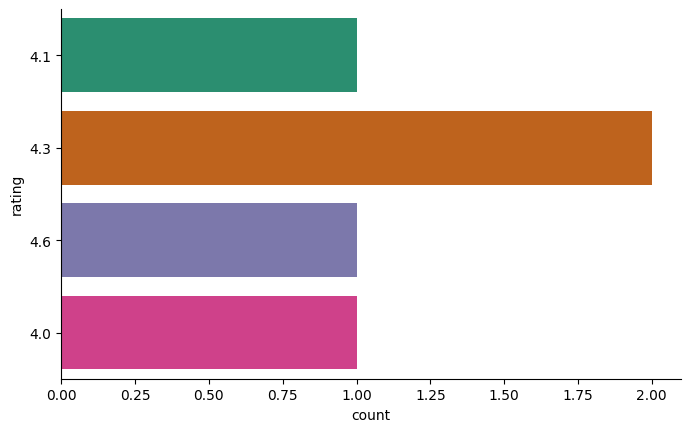

In [27]:
#
import numpy as np
import pandas as pd
from google.colab import autoviz

# Sample DataFrame (Replace this with your actual DataFrame)
data = {'rating': ['4.1', '4.3', '4.6', '4.3', '4.0']}
df = pd.DataFrame(data)

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
    from matplotlib import pyplot as plt
    import seaborn as sns
    plt.figure(figsize=(8 * figscale, 4.8 * figscale))
    sns.countplot(y=colname, data=df, palette=sns.color_palette(mpl_palette_name))
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.show()  # Use plt.show() to display the chart
    return autoviz.MplChart.from_current_mpl_state()

categorical_histogram(df, 'rating', figscale=1, mpl_palette_name='Dark2')



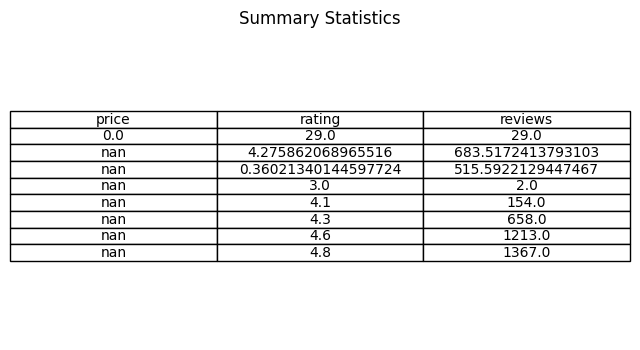

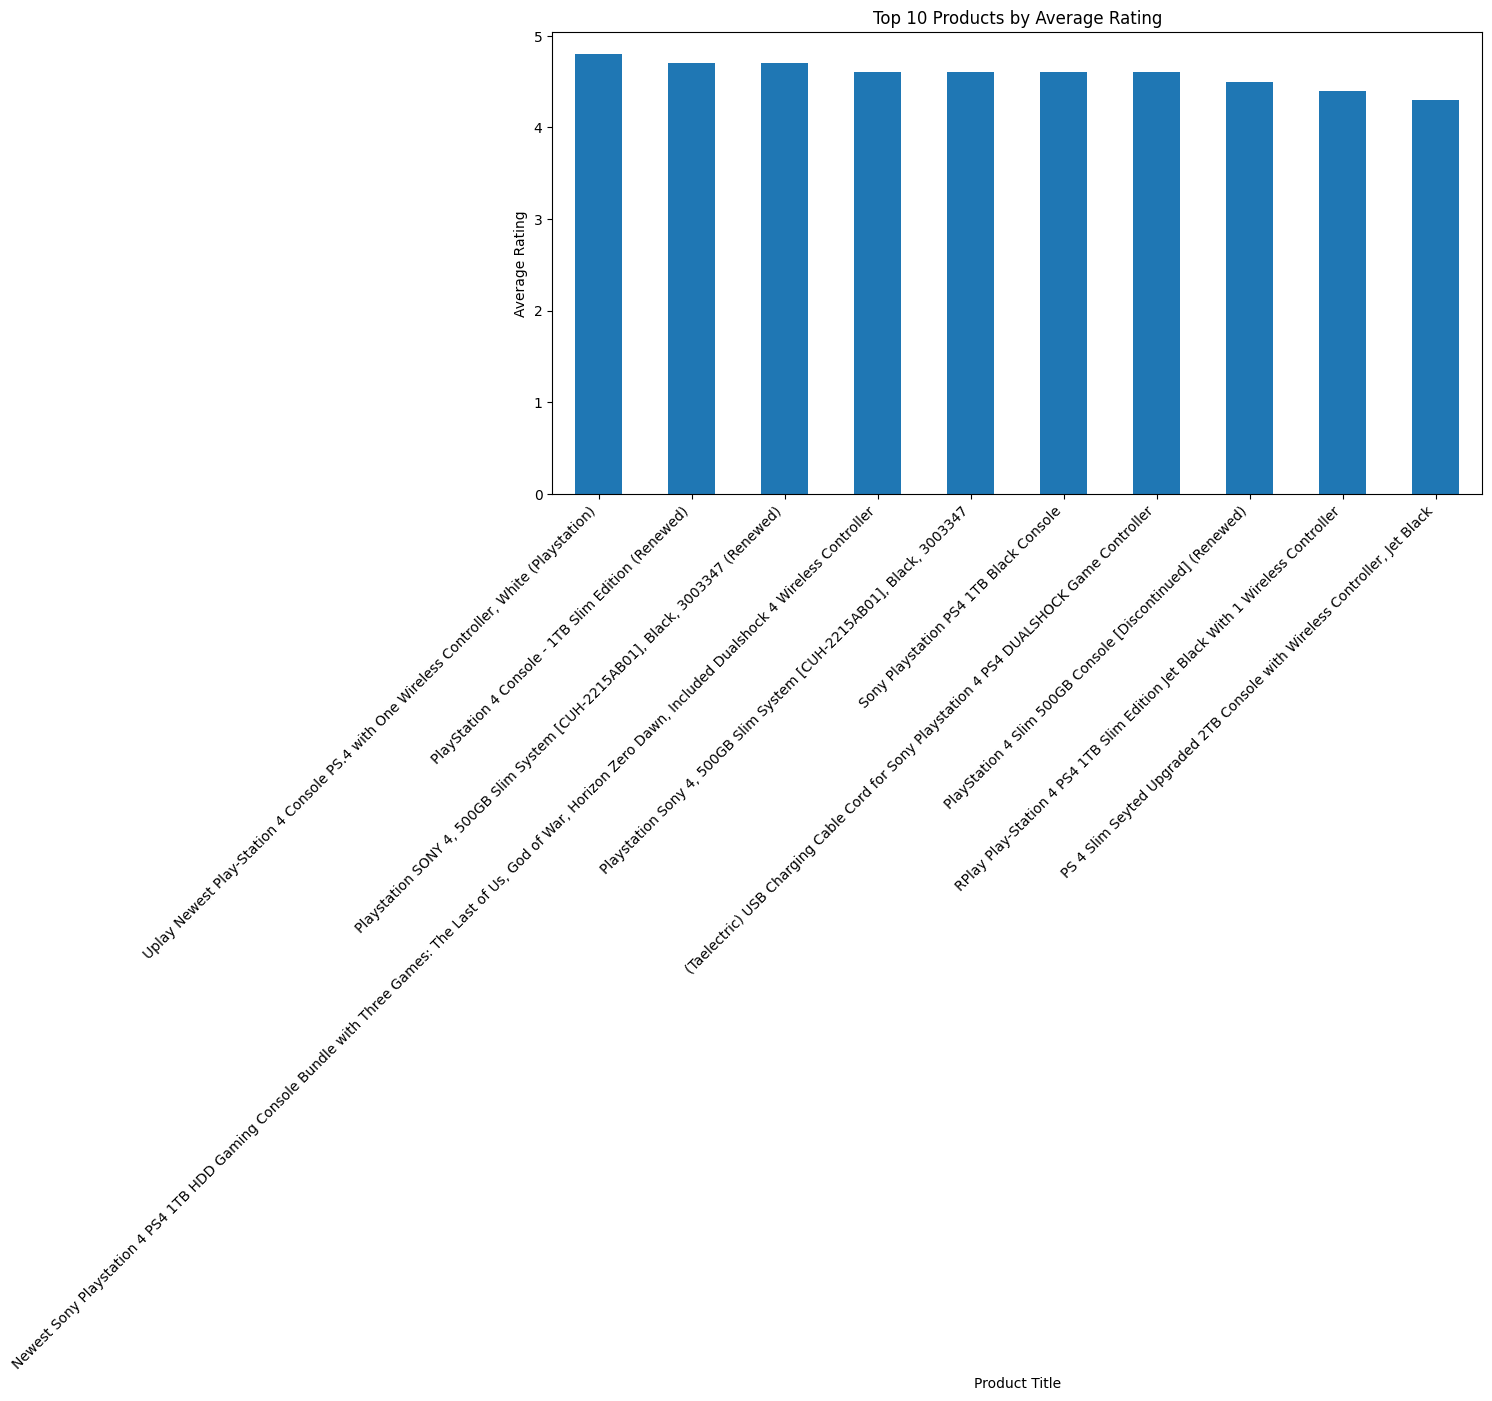

In [17]:
# Product Performace Analysis
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
amazon_df = pd.read_csv("amazon_data.csv")

# Convert 'rating' and 'reviews' columns to numeric
amazon_df['rating'] = amazon_df['rating'].str.extract('(\d+\.\d+)').astype(float)
amazon_df['reviews'] = amazon_df['reviews'].str.replace(',', '').str.extract('(\d+)').astype(int)

# Summary statistics
summary_stats = amazon_df[['price', 'rating', 'reviews']].describe()

# Create a table to display summary statistics
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=summary_stats.values, colLabels=summary_stats.columns, cellLoc='center', loc='center')
plt.title("Summary Statistics")
plt.show()

# Create a bar chart to visualize average ratings by product title
average_ratings = amazon_df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
average_ratings.plot(kind='bar')
plt.xlabel("Product Title")
plt.ylabel("Average Rating")
plt.title("Top 10 Products by Average Rating")
plt.xticks(rotation=45, ha='right')
plt.show()

Group A Mean Rating: 4.364285714285714
Group B Mean Rating: 4.1933333333333325
There is no statistically significant difference in ratings.


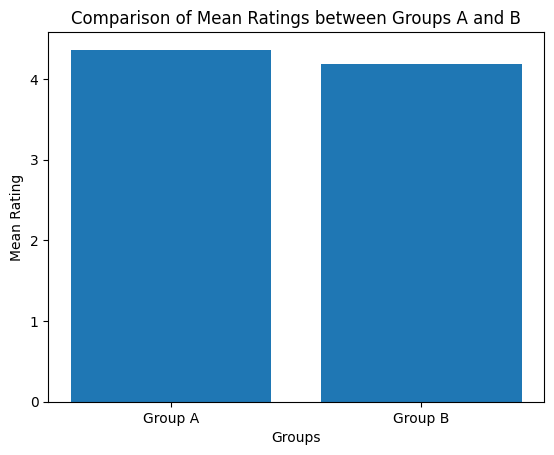

In [28]:
# A/B testing
import pandas as pd
import scipy.stats as stats

# Load your scraped data
amazon_df = pd.read_csv("amazon_data.csv")

# Clean the 'rating' column by extracting the numerical part
amazon_df['rating'] = amazon_df['rating'].str.extract('(\d+\.\d+)').astype(float)

# Split data into two groups (A and B)
group_A = amazon_df.sample(frac=0.5)  # You can adjust the split ratio as needed
group_B = amazon_df.drop(group_A.index)

# Calculate the mean rating for each group
mean_rating_A = group_A['rating'].mean()
mean_rating_B = group_B['rating'].mean()

# Perform a t-test to determine if the difference is statistically significant
t_stat, p_value = stats.ttest_ind(group_A['rating'], group_B['rating'])

# Display the results
print(f"Group A Mean Rating: {mean_rating_A}")
print(f"Group B Mean Rating: {mean_rating_B}")


if p_value < 0.05:
    print("The difference in ratings is statistically significant.")
else:
    print("There is no statistically significant difference in ratings.")

import matplotlib.pyplot as plt

# Create a bar chart to compare mean ratings
plt.bar(['Group A', 'Group B'], [mean_rating_A, mean_rating_B])
plt.xlabel('Groups')
plt.ylabel('Mean Rating')
plt.title('Comparison of Mean Ratings between Groups A and B')
plt.show()

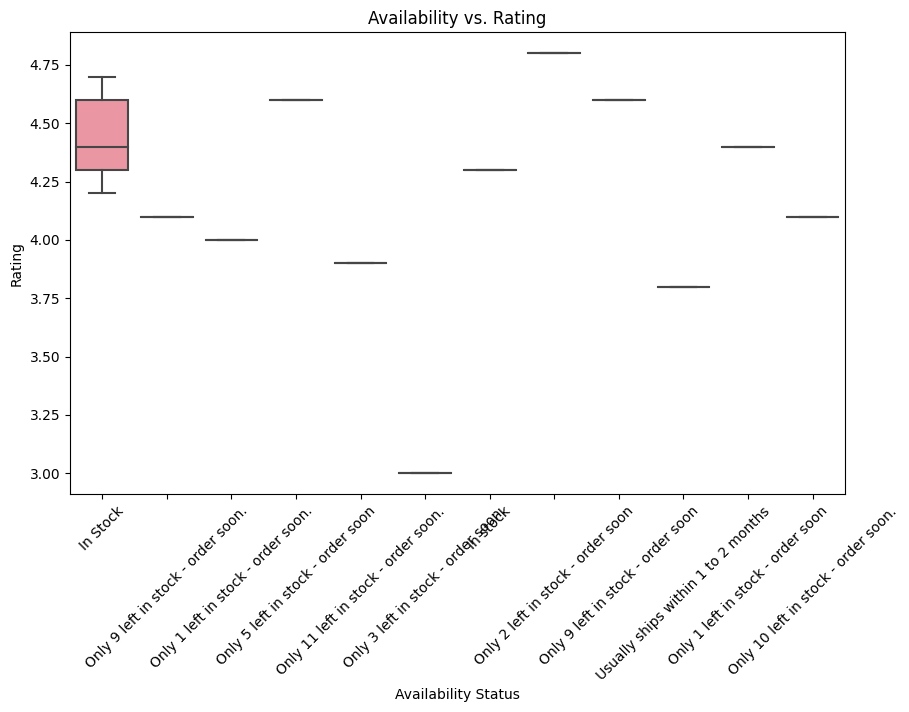


Average Rating by Availability Status:
                           availability    rating
0                              In Stock  4.442857
1                              In stock  4.300000
2     Only 1 left in stock - order soon  4.400000
3    Only 1 left in stock - order soon.  4.000000
4   Only 10 left in stock - order soon.  4.100000
5   Only 11 left in stock - order soon.  3.900000
6     Only 2 left in stock - order soon  4.800000
7    Only 3 left in stock - order soon.  3.000000
8     Only 5 left in stock - order soon  4.600000
9     Only 9 left in stock - order soon  4.600000
10   Only 9 left in stock - order soon.  4.100000
11   Usually ships within 1 to 2 months  3.800000


In [33]:
# Availability vs. Rating Analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Amazon product data from the CSV file
amazon_df = pd.read_csv("amazon_data.csv")

# Convert the 'rating' column to a numeric type (assuming it's a string with stars)
amazon_df['rating'] = amazon_df['rating'].str.extract('(\d+\.\d+)').astype(float)

# Create a box plot to visualize the distribution of ratings based on availability status
plt.figure(figsize=(10, 6))
sns.boxplot(x='availability', y='rating', data=amazon_df, order=amazon_df['availability'].value_counts().index)
plt.title('Availability vs. Rating')
plt.xlabel('Availability Status')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

# Calculate the average rating for each availability status
avg_rating_by_availability = amazon_df.groupby('availability')['rating'].mean().reset_index()
print("\nAverage Rating by Availability Status:")
print(avg_rating_by_availability)


In [20]:
#Top Product Analysis
import pandas as pd
import re

# Load the Amazon product data from the CSV file
amazon_df = pd.read_csv("amazon_data.csv")

# Convert the 'rating' column to a numeric type (assuming it's a string with stars)
amazon_df['rating'] = amazon_df['rating'].str.extract('(\d+\.\d+)').astype(float)

# Extract the numeric part from the 'reviews' column and convert it to a float
amazon_df['reviews'] = amazon_df['reviews'].str.replace(',', '', regex=True)
amazon_df['reviews'] = amazon_df['reviews'].apply(lambda x: re.findall(r'\d+\.*\d*', x)).apply(lambda x: float(x[0]) if x else 0)

# Define a ranking metric (e.g., average rating * total reviews)
amazon_df['ranking_metric'] = amazon_df['rating'] * amazon_df['reviews']

# Sort the DataFrame by the ranking metric in descending order to find the top products
top_products = amazon_df.sort_values(by='ranking_metric', ascending=False)

# Display the top N products (e.g., top 10)
top_N = 10
top_products = top_products.head(top_N)

# Print the top products
print(f"Top {top_N} Products based on Ranking Metric:")
print(top_products[['title', 'rating', 'reviews']])


Top 10 Products based on Ranking Metric:
                                                title  rating  reviews
6   PlayStation 4 Slim 500GB Console [Discontinued...     4.5   1320.0
17  PlayStation 4 Slim 500GB Console [Discontinued...     4.5   1320.0
1    PlayStation 4 Slim 1TB Console - Black (Renewed)     4.3   1367.0
25   PlayStation 4 Slim 1TB Console - Black (Renewed)     4.3   1367.0
16   PlayStation 4 Slim 1TB Console - Black (Renewed)     4.3   1367.0
2              Sony Playstation PS4 1TB Black Console     4.6   1200.0
26             Sony Playstation PS4 1TB Black Console     4.6   1200.0
28  Sony PlayStation 4 Slim Limited Edition 1TB Ga...     4.3   1213.0
3   Sony PlayStation 4 Slim Limited Edition 1TB Ga...     4.3   1213.0
18  Sony PlayStation 4 Slim Limited Edition 1TB Ga...     4.3   1213.0


In [21]:
#Descriptive Statistics
import pandas as pd

# Load the Amazon product data from the CSV file
amazon_df = pd.read_csv("amazon_data.csv")

# Convert the 'rating' column to a numeric type (assuming it's a string with stars)
amazon_df['rating'] = amazon_df['rating'].str.extract('(\d+\.\d+)').astype(float)

# Convert the 'reviews' column to a numeric type (handle values like '698 ratings')
amazon_df['reviews'] = amazon_df['reviews'].str.replace(',', '', regex=True)
amazon_df['reviews'] = amazon_df['reviews'].apply(lambda x: re.findall(r'\d+\.*\d*', x)).apply(lambda x: float(x[0]) if x else 0)

# Calculate basic descriptive statistics for numerical columns
descriptive_stats = amazon_df[['price', 'rating', 'reviews']].describe()

# Print the descriptive statistics
print("Descriptive Statistics for Numerical Columns:")
print(descriptive_stats)


Descriptive Statistics for Numerical Columns:
       price     rating      reviews
count    0.0  29.000000    29.000000
mean     NaN   4.275862   683.517241
std      NaN   0.360213   515.592213
min      NaN   3.000000     2.000000
25%      NaN   4.100000   154.000000
50%      NaN   4.300000   658.000000
75%      NaN   4.600000  1213.000000
max      NaN   4.800000  1367.000000
